In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [2]:
data = pd.read_csv("/home/gedhusek/Downloads/228_482_bundle_archive/diabetes.csv")

# Getting familiar with our data

In [3]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


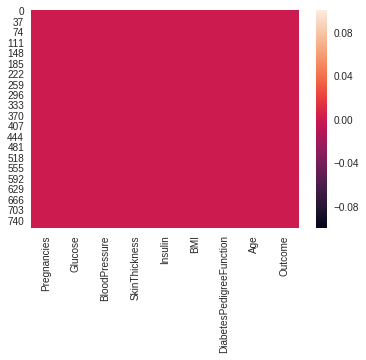

In [5]:
sns.heatmap(data.isnull()) # Exploring if we have some missing values with a usage of heatmap

In [6]:
#We are interested in outcome column, so lets do some features exploring

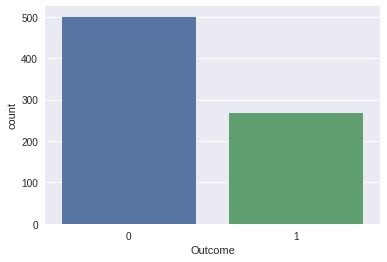

In [7]:
sns.countplot(data["Outcome"]) #This is very important to see if we will be able to predict the outcome
# This is relatively well balanced, so we probably will be able to make a useful model for outcome prediction

In [8]:
#The next thing we are interested in is the correlation between outcome column and the other columns

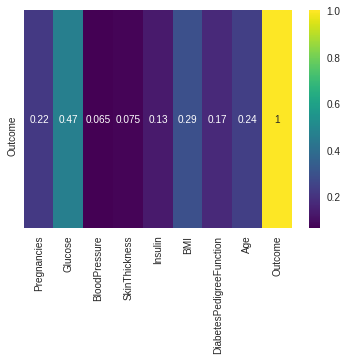

In [9]:
sns.heatmap(data.corr().loc[["Outcome"],:],cmap="viridis",annot=True)

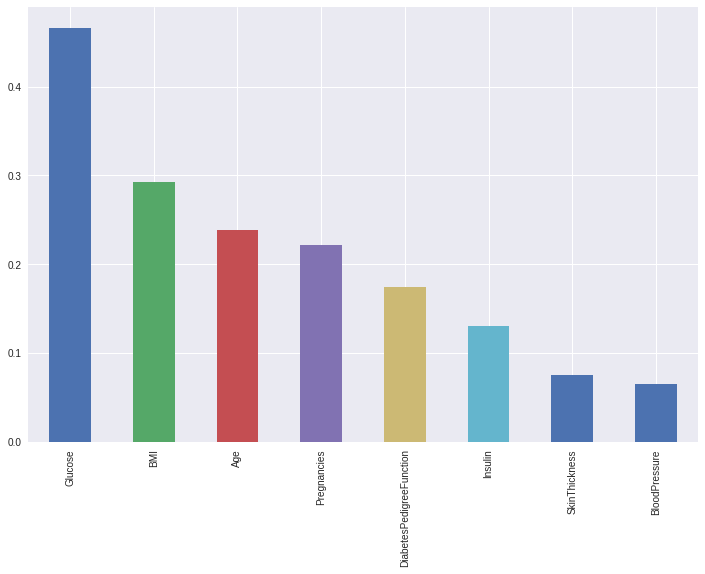

In [10]:
plt.figure(figsize=(12,8))
data.corrwith(data["Outcome"]).sort_values(ascending=False)[1:].plot(kind="bar")

#We can see that the highest correlation is with Glucose

In [11]:
#Lets get familiar with Glucose

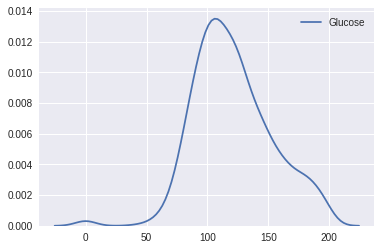

In [12]:
sns.kdeplot(data["Glucose"])
#Here we can see very low values and that seems very strange to me. Lets explore it little more

In [13]:
#So i did i little bit of filtering to have realistic values
data = data[data["Glucose"]>40]

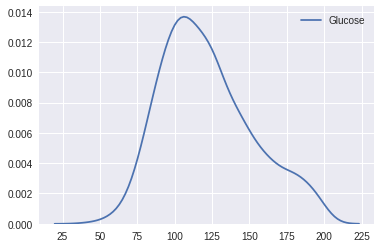

In [14]:
sns.kdeplot(data["Glucose"]) #This looks a lot better

In [15]:
#Lets look at the Age information - correlation was pretty high there too

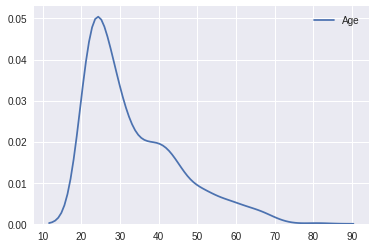

In [16]:
sns.kdeplot(data["Age"]) #First we are interested in the distribution 

In [17]:
#Its very strange that the mean Age is 25 years

In [18]:
#Next interesting thing might be explore BMI with Age

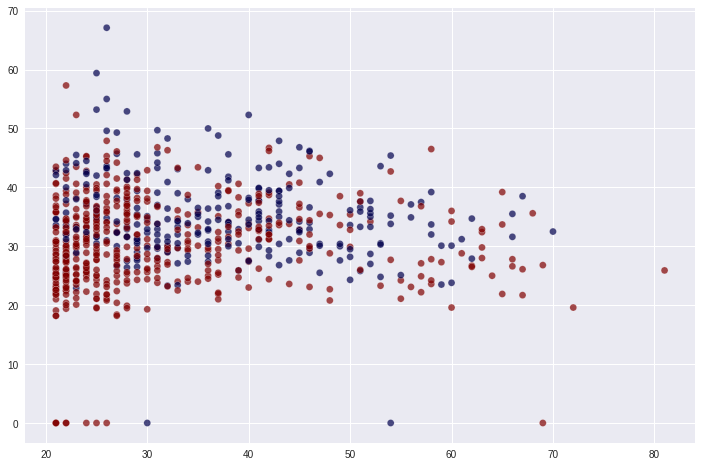

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(data["Age"],data["BMI"],c=data["Outcome"],cmap="seismic_r",alpha=0.7,edgecolors="white")
#There is no trend between them

# Model Preparation

In [20]:
#We could make more data exploration but for the sake of time we wont
#Now lets prepare the model for predicting the outcome

In [21]:
#First we need to split our data into dependent and independent features

In [22]:
X = data.drop("Outcome",axis=1).values
y = data["Outcome"].values

In [23]:
#Next we will perfome train test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
#Scaling the data 

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#By doing this we have the values in X_train and X_test in range from 0 to 1

In [29]:
#Lets import needed libraries for model creation

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
model = Sequential()
model.add(Dense(60,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(50,activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(40,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(20,activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid")) #Because we are doing logistic regression, we need to use sigmoid in the output layer

In [32]:
#Compiling the model
model.compile(loss="mse",optimizer="adam",metrics=["accuracy"])

In [33]:
#Make Early Stopping
early_stopping = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=30)

In [34]:
#Fit the model
model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),callbacks=[early_stopping],verbose=1)

Epoch 1/500
17/17 [==============================] - 0s 26ms/step - loss: 0.2360 - accuracy: 0.6517 - val_loss: 0.2293 - val_accuracy: 0.6419
Epoch 2/500
17/17 [==============================] - 0s 8ms/step - loss: 0.2214 - accuracy: 0.6610 - val_loss: 0.2212 - val_accuracy: 0.6463
Epoch 3/500
17/17 [==============================] - 0s 7ms/step - loss: 0.2132 - accuracy: 0.6854 - val_loss: 0.2109 - val_accuracy: 0.6594
Epoch 4/500
17/17 [==============================] - 0s 9ms/step - loss: 0.2086 - accuracy: 0.6760 - val_loss: 0.2003 - val_accuracy: 0.6812
Epoch 5/500
17/17 [==============================] - 0s 8ms/step - loss: 0.1992 - accuracy: 0.7079 - val_loss: 0.1922 - val_accuracy: 0.6900
Epoch 6/500
17/17 [==============================] - 0s 8ms/step - loss: 0.1916 - accuracy: 0.7266 - val_loss: 0.1863 - val_accuracy: 0.7074
Epoch 7/500
17/17 [==============================] - 0s 8ms/step - loss: 0.1790 - accuracy: 0.7322 - val_loss: 0.1811 - val_accuracy: 0.7162
Epoch 8/500


Epoch 59/500
17/17 [==============================] - 0s 7ms/step - loss: 0.1387 - accuracy: 0.7884 - val_loss: 0.1653 - val_accuracy: 0.7555
Epoch 00059: early stopping


In [35]:
loss_df = pd.DataFrame(model.history.history)

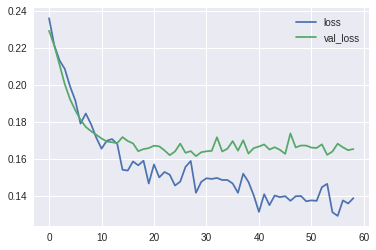

In [36]:
loss_df[["loss","val_loss"]].plot()

In [37]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[126  21]
 [ 35  47]]


             precision    recall  f1-score   support

          0       0.78      0.86      0.82       147
          1       0.69      0.57      0.63        82

avg / total       0.75      0.76      0.75       229



In [40]:
#75% in this case is not great 

In [41]:
#It can be caused by lack of cases - small sample

In [44]:
len(data) #We have only 763 cases, thats really not enough

763

In [45]:
#And our Outcome values were not perfectly balanced